# Course Review with Project Exemplar

You've reached your final week and should be putting all of your knowledge to practice in your project to demonstrate what you have learned.  As a review, we'll look at how we applied the concepts from this course into creating the project exemplar.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">Because this is a review, we have included information explaining what concepts are used with links to the sections where they were covered.  As this would not normally be part of a report, these sections will be displayed in a box like this.<br/>

You should not include such explanations in your Jupyter notebook that you hand in for your report,  but they should be part of your video journal explanation.</blockquote>

As you go through this review, you will want to review your Jupyter notebooks to remind yourself of the different objects, attributes and methods used.

<hr>

<center>
<h2> Weather in Australia  </h2> 
    
This report provides visualisation of Australian weather data and the relationship between different data.  

<h2> The Data </h2>

The data used in this report comes from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package.  The data contains daily weather observations taken from various weather stations in Australia from 1st November 2007 to 27th June 2017.

The data includes 124,000 rows of weather observation data.  Each row represents a unique observation set and each observation set contains the attributes shown in the table below


| Attribute | Description| Type |
| --- | ---------- | --- |
| Date | The date of observation | Data time
| Location|  Name of the location of the weather station | String|
| MinTemp|  Minimun temperature in $^\circ C$ | Float|
| MaxTemp|  Maximum temperature in $^\circ C$ | Float|
| Rainfall|  Amount of rainfall for the day in $mm$ | Float|
| Rainfall|  A pan evaporation  class A in $mm$ in the 24 hours to 9am | Float|
| Sunshine|  Number of hours of bright sunshine in the day | Float|
| WindGustDir|  Direction of the strongest wind gust in the 24 hours to midnight| String|
| WindGustSpeed|  Speed in $Km/hr$ of the strongest wind gust in the 24 hours to midnight| Float|
| WindDir9am|  Direction of the wind at 9am | String|
| WindDir3pm|  Direction of the wind at 3pm | String|
| WindSpeed9am|  Wind speed in $km/hr$ averaged over 10 minutes prior to 9am | Float|
| WindSpeed3pm|  Wind speed in $km/hr$ averaged over 10 minutes prior to 3pm | Float|
| Humidity9am|  Humidity in percentage at 9am | Float|
| Humidity3pm|  Humidity in percentage at 3pm | Float|
| Pressure9am|  Atmospheric pressure in $hpa$ reduced to mean sea level at 9am | Float|
| Pressure3pm|  Atmospheric pressure in $hpa$ reduced to mean sea level at 3pm | Float|
|Cloud9am| Fraction of sky obscured by cloud at 9am, measured in $oktas$ in a range 0 (sky clear) to 8 (sky completely overcast)|Float|
|Cloud3pm| Fraction of sky obscured by cloud at 3pm, measured in $oktas$ in a range 0 (sky clear) to 8 (sky completely overcast)|Float|
|Temp9am| Temperature in $^\circ C$ at 9am|Float|
|Temp3pm| Temperature in $^\circ C$ at 3pm|Float|
|RainToday| Boolean attribute. 'Yes' if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 'No' |String|
|RISK_MM| Amount of next day rain in $mm$. Used to create response variable RainTomorrow. A kind of measure of the "risk". |Float|
|RainTomorrow| The target variable. Did it rain tomorrow? Boolean. 'Yes' if we predict rain for tomorrow, otherwise 'No'|String|

### Full Data Set

The complete data set is shown below.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">This plot is generated by using the Pandas read_csv function.  parse_dates has been used so that the Date column can be filtered as a date rather than a string.  I use this later to filter all the values for specific months across all the years of data.<br/>

I've imported 3 libraries:  

* Matplotlib is used to create subplots within the figure where I want to show more than one plot together.
* Pandas is used for filtering data and for all plots not created with seaborn.  
* Seaborn is used to create the Heatmap, Box and Scatter plots.</blockquote>

In [2]:
#Indicating the plot is displayed directly below the code cell that produced it
%matplotlib inline
import pandas as pd #pandas is a library with structures and operations  to data manipulation 
import matplotlib.pyplot as plt #matplotlib is a library to plotting
import seaborn as sns #seaborn is a library for statistical data visualization

#the dataset is in the current directory
df = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])
#Showing the first four rows 
df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-01-12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-02-12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-03-12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-04-12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No


### Minimum and Maximum Temperatures

The plots below show several ways of viewing just the minimum and maximum temperatures.  The raw data is shown below.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">I use the Pandas groupby() method to group the data together by location.  This will allow me to do calculations for each location as a single group.  I select the MinTemp and MaxTemp columns as the values I want to use and apply the mean function to get the mean MinTemp and mean MaxTemp for each location.</blockquote>

In [3]:
#Using a query to getting the average of minimum and maximum temperature per location
temp_avg_by_location = df.groupby('Location')[['MinTemp', 'MaxTemp']].mean().reset_index()
temp_avg_by_location #Showing the resulting query

,Location,MinTemp,MaxTemp
0,Adelaide,12.628368,22.945402
1,Albany,12.948461,20.072587
2,Albury,9.520899,22.630963
3,AliceSprings,13.125182,29.244191
4,BadgerysCreek,11.136900,24.023111
5,Ballarat,7.355302,18.274794
6,Bendigo,8.591065,21.616683
7,Brisbane,16.410998,26.441527
8,Cairns,21.199197,29.544344
9,Canberra,6.827688,20.980644


## Visualizing the Minimum and Maximum Temperatures through plots 

How do towns compare in their minimum and maximum temperatures? In the bar plot below we can see the minimum temperatures (on the left) and maximum temperatures (on the right).  In this plot we can easily see that Mount Ginini has the coldest recorded temperature and Katherine has the hottest recorded temperature.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">Here I have used Matplotlib subplots to show the min and max temperatures side by side in a single figure.  Pandas is being used to plot the data frame temp_avg_by_location created in the previous section.  I plot the MinTemp on the left (axs[0]) and the MaxTemp in the right (axs[1]).  The tight_layout() removes the extra space in my graphs.</blockquote>

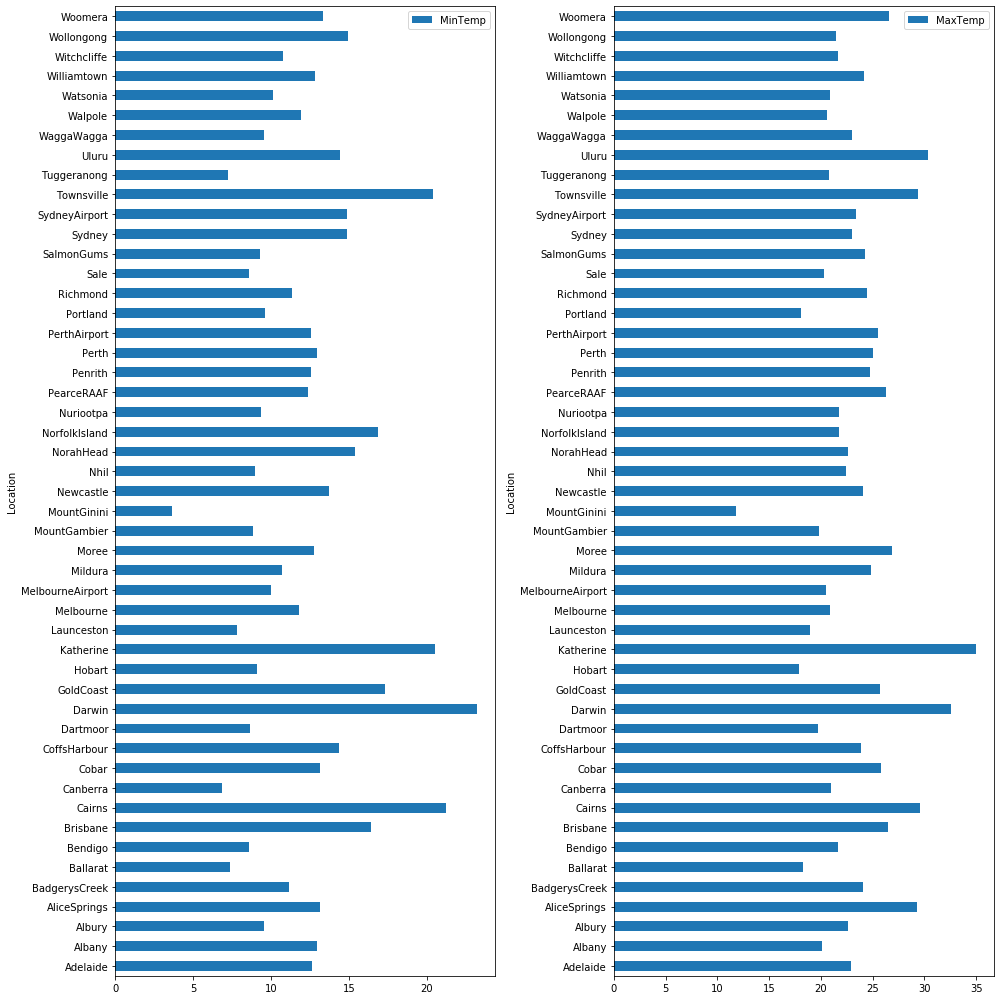

In [4]:
# Visualising bar plot 
fig,axs = plt.subplots(1, 2, figsize=(14,14))
temp_avg_by_location.plot('Location', 'MinTemp', kind='barh', ax=axs[0])
temp_avg_by_location.plot('Location', 'MaxTemp', kind='barh', ax=axs[1])
plt.tight_layout()

### How cold does it get?

This plot shows how cold it can get in the different areas.  This show the lowest recorded temperature for each location.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">I used the Pandas group by to group my data by location.  I then selected the MinTemp column and found the minimum value using the min() method.  I found sort_values() while reading about Pandas Series type and used it to order the results from smallest to largest.  I then plotted using the Pandas plot horizontal bar function (barh).</blockquote> 

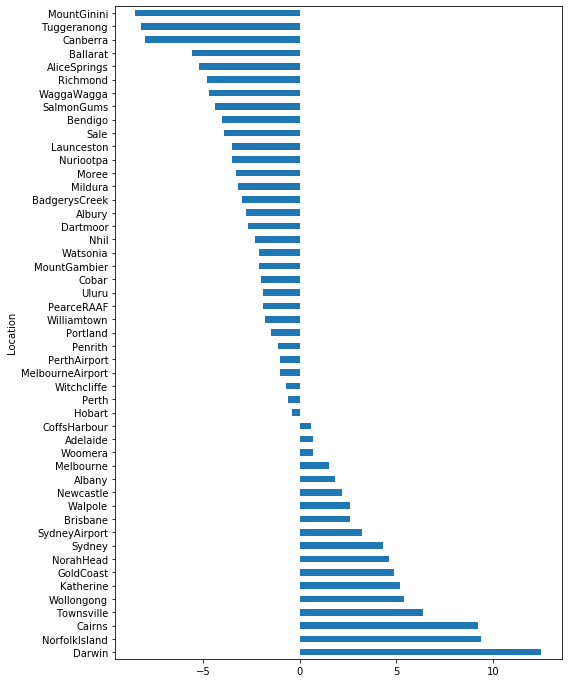

In [5]:
df.groupby('Location')['MinTemp'].min().sort_values(ascending=False).plot.barh(figsize=(8,12));

### How consistent are the temperatures in different towns? 

The box plot below shows the range of daily maximums for each of the different locations.  This plot shows that Cairns and Townsville don't have a lot of variation in the daily maximums - the weather is similar year round, whereas places such as Woomera and Uluru have a wide range of daily maximums.  There are no outliers for Woomera and Uluru though.  Whereas places such as Albany have alot a lot of outliers - so you may come across some unusually hot days.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">Here I have used seaborn to show the range of maximum temperatures as a box plot.  I decided to use seaborn as it has a more visually appealing plot than the equivalent Pandas default box plot.</blockquote>

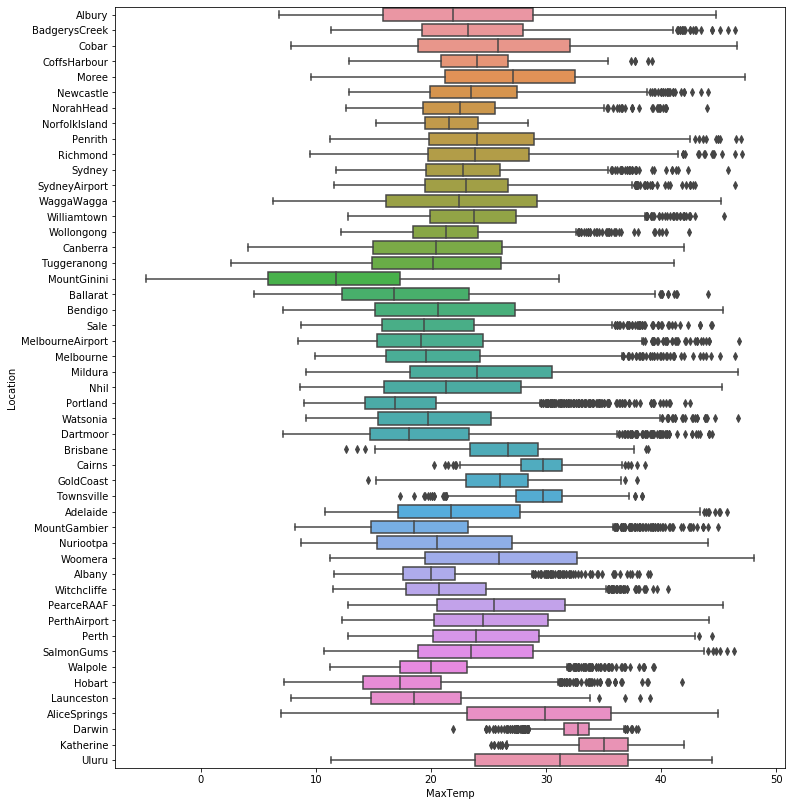

In [6]:
# Showing in a box plot the maximum temperatures per location 
fig,ax = plt.subplots(figsize=(12,14))
sns.boxplot('MaxTemp', 'Location', data=df, ax=ax);

## Weather in Adelaide

We now turn to looking just at Adelaide.  The first question I want to answer is what is the average 
Minimum and Maximum temperature in Adelaide for each Month?

<blockquote style="border-left-color:#c28900;background:#eddcb4;">I want to add month and day information to my current data frame as it currently just has dates. I then need to filter my data to just work with the Adelaide data.  I do this by creating a dataframe from the full data by selecting just the rows where the Location equals "Adelaide".  I then group this data by month and select the MinTemp and MaxTemp columns and apply the mean() method to them.  This gives me the mean Min and mean Max temp for each month in Adelaide.</blockquote>

In [7]:
# Add month the month, day and name to the day to the dataset 
df['month'] = df.Date.dt.month
df['month_name'] = df.Date.dt.month_name()
df['day'] = df.Date.dt.day

In [8]:
#Filtering the data from Adelaide
df_adelaide = df[df.Location == "Adelaide"]

In [9]:
#Showing the first two rows of the df_Adelaide 
df_adelaide.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,month,month_name,day
93856,2008-01-07,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,NaN,NaN,13.5,14.9,Yes,0.8,No,1,January,7
93857,2008-02-07,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,NaN,NaN,13.7,15.5,No,0.0,No,2,February,7


<blockquote style="border-left-color:#c28900;background:#eddcb4;">Here I plotted the values.  I used the style property of Data Frames to get a nicer horizontal bar plot.  I looked up the style property online on the <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html" target="_blank">Pandas user guide</a> while reading about Data Frames.</blockquote>

In [10]:
# Showing the min and max in average in Adelaide 
adelaide_temps = df_adelaide.groupby(['month','month_name'])[['MinTemp','MaxTemp']].mean()
adelaide_temps.style.bar()

,,MinTemp,MaxTemp
month,month_name,,
1,January,15.9415,27.8307
2,February,15.4224,26.6293
3,March,14.2125,24.9886
4,April,12.5523,22.8222
5,May,11.2748,20.3302
6,June,9.91468,18.8988
7,July,9.8717,18.3263
8,August,10.0429,19.3437
9,September,11.1418,20.9504


### What affects the weather values?

The plot below compares the relationship between different columns of the data to see if there are correlations.  The closer the data is to a line, the more correlated the data is.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">For this plot I used seaborn as covered in week 6.  I first showed all of the columns by selecting the columns property of my Adelaide only data frame.  I then selected out the columns of interest.</blockquote>

In [11]:
#Show the columns of the Adelaide dataset 
df_adelaide.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'month',
       'month_name', 'day'],
      dtype='object')

/Users/a1066092/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a1066092/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


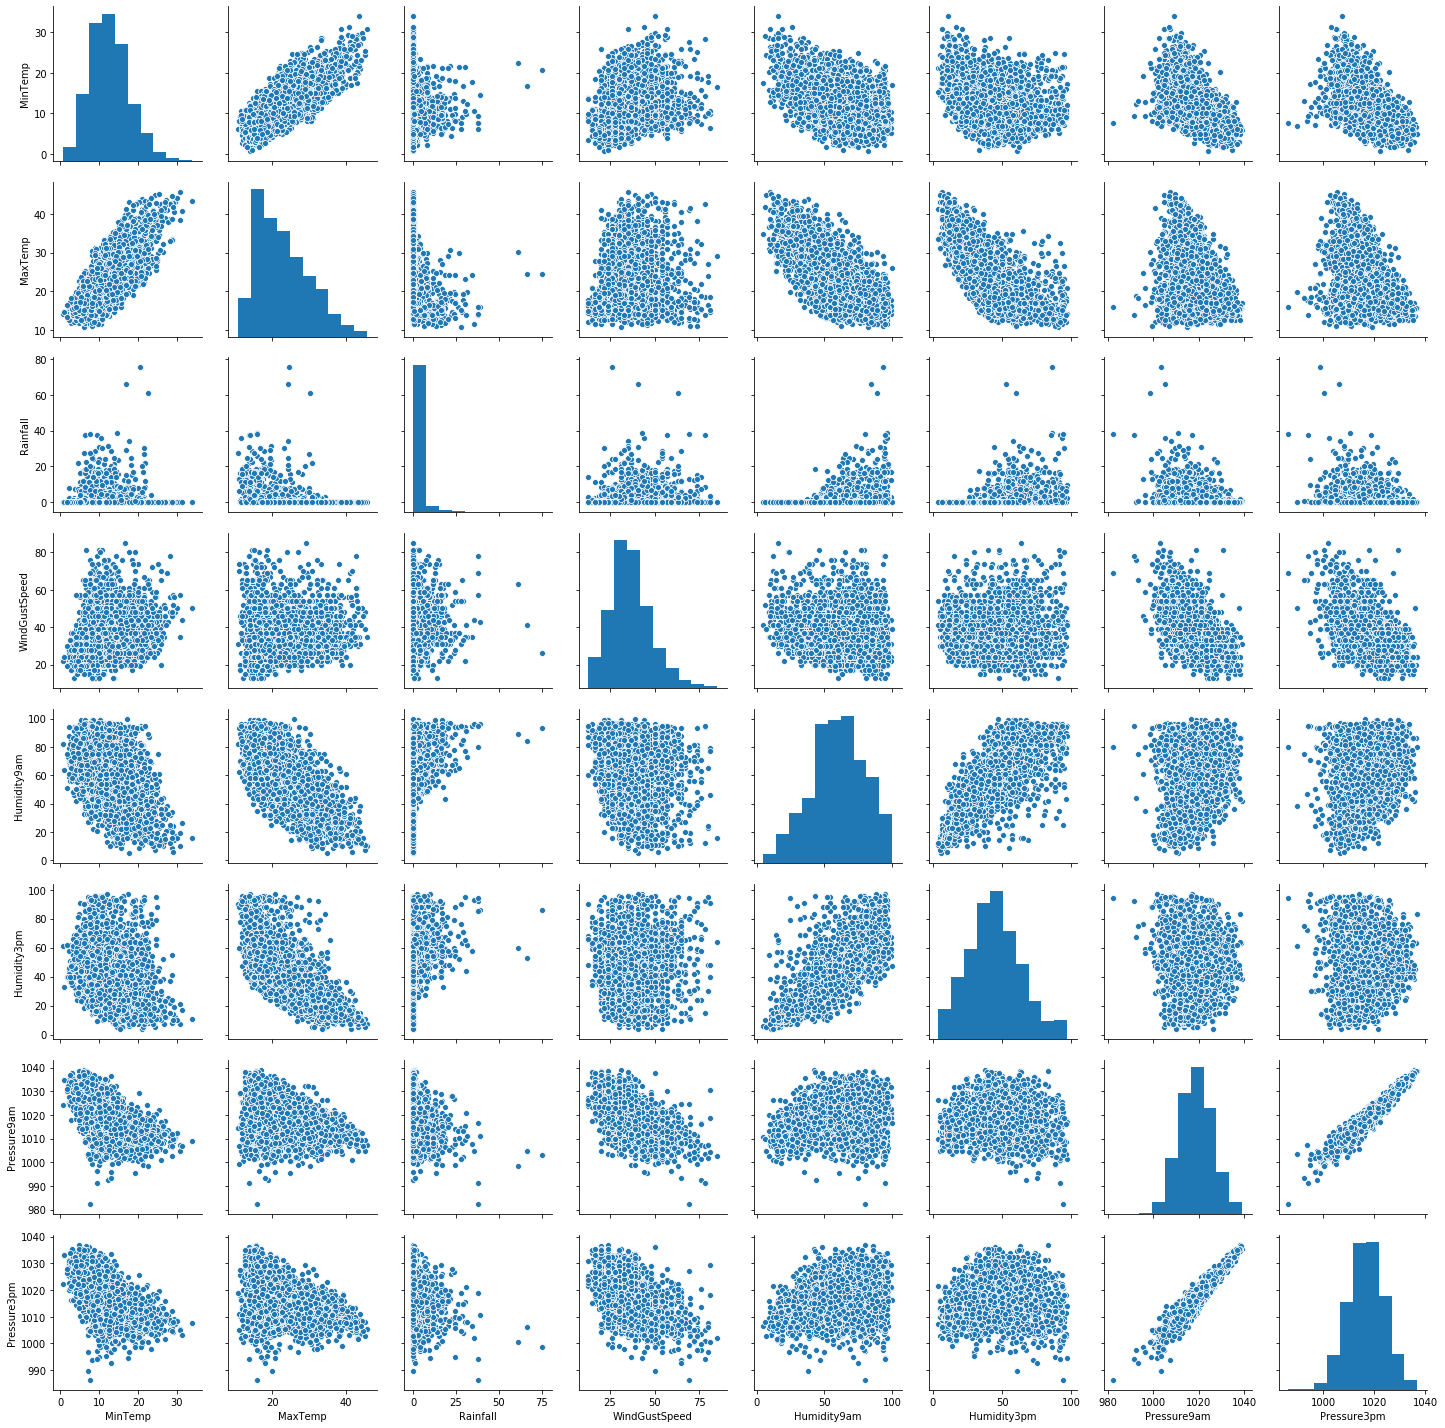

In [12]:
#Showing the relationship between pair of atributes 

sns.pairplot(df_adelaide[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                                                 'Humidity9am','Humidity3pm','Pressure9am', 'Pressure3pm']])

The plots show a correlation between 9am pressure and 3pm pressure as well as MaxTemp and MinTemp.

### Another view of how weather values are related

The plot below compares the relationship between different columns of the data using a heatmap.  The brighter colours show stronger correlations.  Again we can see that MaxTemp and MinTemp have light colours where they intersect, as do 9am pressure and 3pm pressure.

<blockquote style="border-left-color:#c28900;background:#eddcb4;">For this plot I again used seaborn as this is much easier to produce a nice heatmap in.  I got the correlation values using the scipy stats library as demonstrated in the week 6 example.  I used a for loop to iterate over all of the items in the data frame selecting the items which are numeric and storing those column names in numerical_columns.</blockquote>

In [13]:
from scipy.stats import spearmanr #spearmanr is a method that returns the correlation between  numerical attributes 

In [14]:
#Query to get the numeric columns (attributes)
numerical_columns = [n for n,col in df.items() if pd.api.types.is_numeric_dtype(col)]
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM',
 'month',
 'day']

In [15]:
#Getting the correlations between pair of columns 
corr = spearmanr(df[numerical_columns].dropna()).correlation

In [16]:
#corr is two-dimensional array [19 by 19] all the numerical columns with values 
#between -1 to 1 that corresponing to
#the value of the correlation between the columns
corr

array([[ 1.00000000e+00,  7.62575049e-01,  2.39058373e-02,
         5.80803680e-01,  1.14097281e-01,  1.59176728e-01,
         1.46114236e-01,  1.62697017e-01, -1.77152058e-01,
         8.53417807e-02, -5.05652117e-01, -5.18691248e-01,
         9.85815995e-02,  3.99111629e-02,  9.09072188e-01,
         7.39447162e-01,  6.81842488e-02, -9.23625906e-02,
        -3.90262942e-02],
       [ 7.62575049e-01,  1.00000000e+00, -2.84511574e-01,
         7.05866299e-01,  4.91321384e-01,  6.85566161e-02,
         1.73119410e-02,  4.29633548e-02, -4.55671224e-01,
        -4.01390227e-01, -3.89954100e-01, -4.84403071e-01,
        -2.63675726e-01, -2.59734233e-01,  9.01024484e-01,
         9.85774655e-01, -2.04687654e-01, -7.33152186e-02,
        -3.28656651e-02],
       [ 2.39058373e-02, -2.84511574e-01,  1.00000000e+00,
        -3.12269567e-01, -3.97306938e-01,  1.24155405e-01,
         7.20529035e-02,  7.82193074e-02,  4.69281243e-01,
         4.56461226e-01, -1.61547930e-01, -7.13284378e-02,
    

### Plot Heatmap of the correlations

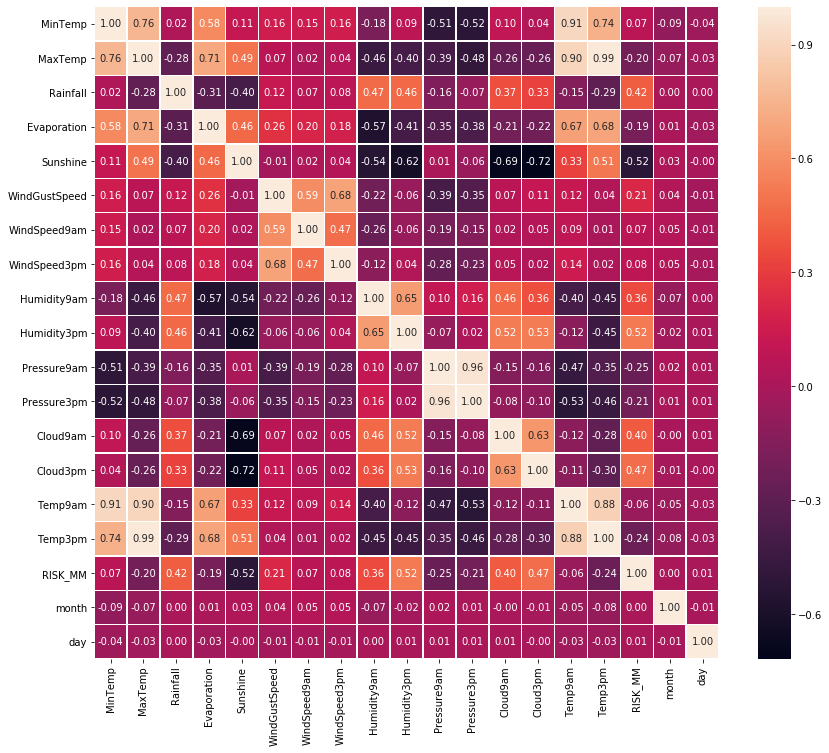

In [17]:
# To manage subplots 
plt.figure(figsize=(14,12)) #Setting a size in the plot
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5,
           xticklabels=numerical_columns, yticklabels=numerical_columns)